<a href="https://colab.research.google.com/github/Scottilano/ISTM-660/blob/main/bankrupt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#some libraries
#import pandas:
import pandas as pd
#import numpy:
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#several others
import scipy
import sklearn
import graphviz

In [4]:
#Upload files via google colab (not a typical import process for Python)
from google.colab import files
files.upload()

Saving Test.csv to Test.csv


{'Test.csv': b'Firm,WC/TA,RE/TA,EBIT/TA,MVE/TD,S/TA\r\nA,0.1759,0.1343,0.0946,0.1955,1.9218\r\nB,0.3732,0.3483,-0.0013,0.3483,1.8223\r\nC,0.1725,0.3238,0.1040,0.8847,0.5576\r\nD,0.1630,0.3555,0.0110,0.3730,2.8307\r\nE,0.1904,0.2011,0.1329,0.5580,1.6623\r\nF,0.1123,0.2288,0.0100,0.1884,2.7186\r\nG,0.0732,0.3526,0.0587,0.2349,1.7432\r\nH,0.2653,0.2683,0.0235,0.5118,1.8350\r\nI,0.1070,0.0787,0.0433,0.1083,1.2051\r\nJ,0.2921,0.2390,0.0673,0.3402,0.9277'}

In [5]:
#Python datasets
train = pd.read_csv('/content/Training.csv');
test = pd.read_csv('/content/Test.csv');

In [6]:
#what's in it?
train.head()

,Firm,WC/TA,RE/TA,EBIT/TA,MVE/TD,S/TA,BR/NB
0,1,0.1650,0.1192,0.2035,0.8130,1.6702,1
1,2,0.1415,0.3868,0.0681,0.5755,1.0579,1
2,3,0.5804,0.3331,0.0810,1.1964,1.3572,1
3,4,0.2304,0.2960,0.1225,0.4102,3.0809,1
4,5,0.3684,0.3913,0.0524,0.1658,1.1533,1


In [7]:
test.head()

,Firm,WC/TA,RE/TA,EBIT/TA,MVE/TD,S/TA
0,A,0.1759,0.1343,0.0946,0.1955,1.9218
1,B,0.3732,0.3483,-0.0013,0.3483,1.8223
2,C,0.1725,0.3238,0.1040,0.8847,0.5576
3,D,0.1630,0.3555,0.0110,0.3730,2.8307
4,E,0.1904,0.2011,0.1329,0.5580,1.6623


# Naive Bayes

In [8]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

#Train the model using the training set
features = train[['WC/TA','RE/TA','EBIT/TA','MVE/TD','S/TA']]
label = train[['BR/NB']]

nb = model.fit(features,label)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
train['Predicted_BR/NB'] = nb.predict(features)

In [10]:
#print the training data with predicted values
print(train)

    Firm   WC/TA   RE/TA  EBIT/TA  MVE/TD    S/TA  BR/NB  Predicted_BR/NB
0      1  0.1650  0.1192   0.2035  0.8130  1.6702      1                1
1      2  0.1415  0.3868   0.0681  0.5755  1.0579      1                1
2      3  0.5804  0.3331   0.0810  1.1964  1.3572      1                1
3      4  0.2304  0.2960   0.1225  0.4102  3.0809      1                1
4      5  0.3684  0.3913   0.0524  0.1658  1.1533      1                0
5      6  0.1527  0.3344   0.0783  0.7736  1.5046      1                1
6      7  0.1126  0.3071   0.0839  1.3429  1.5736      1                1
7      8  0.0141  0.2366   0.0905  0.5863  1.4651      1                1
8      9  0.2220  0.1797   0.1526  0.3459  1.7237      1                0
9     10  0.2776  0.2567   0.1642  0.2968  1.8904      1                1
10    11  0.2689  0.1729   0.0287  0.1224  0.9277      0                0
11    12  0.2039 -0.0476   0.1263  0.8965  1.0457      0                0
12    13  0.5056 -0.1951   0.2026  0.5

In [11]:
#determine accuracy
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
#confusion matrix
cf_matrix = confusion_matrix(train['BR/NB'], train['Predicted_BR/NB'])
print(cf_matrix)

[[10  0]
 [ 2  8]]


**Note: The actual class values are shown as rows and predicted values are columns**

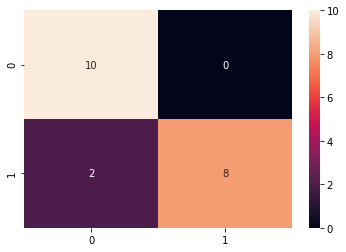

In [13]:
#pretty version
import seaborn as sns
sns.heatmap(cf_matrix,annot=True)

In [14]:
#classification report
print(classification_report(train['BR/NB'], train['Predicted_BR/NB']))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



In [15]:
#predicted value for test
test['NB_Predicted_BR/NB'] = nb.predict(test[['WC/TA','RE/TA','EBIT/TA','MVE/TD','S/TA']])

In [16]:
#test predictions
print(test)

  Firm   WC/TA   RE/TA  EBIT/TA  MVE/TD    S/TA  NB_Predicted_BR/NB
0    A  0.1759  0.1343   0.0946  0.1955  1.9218                   0
1    B  0.3732  0.3483  -0.0013  0.3483  1.8223                   0
2    C  0.1725  0.3238   0.1040  0.8847  0.5576                   1
3    D  0.1630  0.3555   0.0110  0.3730  2.8307                   1
4    E  0.1904  0.2011   0.1329  0.5580  1.6623                   1
5    F  0.1123  0.2288   0.0100  0.1884  2.7186                   0
6    G  0.0732  0.3526   0.0587  0.2349  1.7432                   1
7    H  0.2653  0.2683   0.0235  0.5118  1.8350                   0
8    I  0.1070  0.0787   0.0433  0.1083  1.2051                   0
9    J  0.2921  0.2390   0.0673  0.3402  0.9277                   0


# knn

In [17]:
#independent variables
X = train.drop(["BR/NB","Firm","Predicted_BR/NB"], axis=1)
#X = X.values
#dependent
y = train["BR/NB"]
#y = y.values
print(X)

     WC/TA   RE/TA  EBIT/TA  MVE/TD    S/TA
0   0.1650  0.1192   0.2035  0.8130  1.6702
1   0.1415  0.3868   0.0681  0.5755  1.0579
2   0.5804  0.3331   0.0810  1.1964  1.3572
3   0.2304  0.2960   0.1225  0.4102  3.0809
4   0.3684  0.3913   0.0524  0.1658  1.1533
5   0.1527  0.3344   0.0783  0.7736  1.5046
6   0.1126  0.3071   0.0839  1.3429  1.5736
7   0.0141  0.2366   0.0905  0.5863  1.4651
8   0.2220  0.1797   0.1526  0.3459  1.7237
9   0.2776  0.2567   0.1642  0.2968  1.8904
10  0.2689  0.1729   0.0287  0.1224  0.9277
11  0.2039 -0.0476   0.1263  0.8965  1.0457
12  0.5056 -0.1951   0.2026  0.5380  1.9514
13  0.1759  0.1343   0.0946  0.1955  1.9218
14  0.3579  0.1515   0.0812  0.1991  1.4582
15  0.2845  0.2038   0.0171  0.3357  1.3258
16  0.1209  0.2823  -0.0113  0.3157  2.3219
17  0.1254  0.1956   0.0079  0.2073  1.4890
18  0.1777  0.0891   0.0695  0.1924  1.6871
19  0.2409  0.1660   0.0746  0.2516  1.8524


In [18]:
from sklearn.neighbors import KNeighborsClassifier
#using n = 3
knn_model = KNeighborsClassifier(n_neighbors=3)

In [19]:
knn = knn_model.fit(X, y)

In [20]:
test['knn_Predicted_BR/NB'] = knn.predict(test[['WC/TA','RE/TA','EBIT/TA','MVE/TD','S/TA']])

In [21]:
print(test)

  Firm   WC/TA   RE/TA  ...    S/TA  NB_Predicted_BR/NB  knn_Predicted_BR/NB
0    A  0.1759  0.1343  ...  1.9218                   0                    0
1    B  0.3732  0.3483  ...  1.8223                   0                    1
2    C  0.1725  0.3238  ...  0.5576                   1                    0
3    D  0.1630  0.3555  ...  2.8307                   1                    0
4    E  0.1904  0.2011  ...  1.6623                   1                    1
5    F  0.1123  0.2288  ...  2.7186                   0                    0
6    G  0.0732  0.3526  ...  1.7432                   1                    0
7    H  0.2653  0.2683  ...  1.8350                   0                    1
8    I  0.1070  0.0787  ...  1.2051                   0                    0
9    J  0.2921  0.2390  ...  0.9277                   0                    1

[10 rows x 8 columns]
